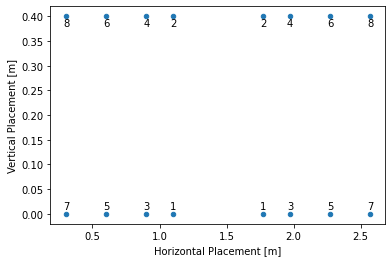

In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import sys
sys.path.append('../WingboxSimulation')
import structure_analysis as sa
import matplotlib.pyplot as plt
import pandas as pd
from StrainGaugeCoordinates import strgauge

%matplotlib inline


In [2]:
##Setup

bucklingForce = 3e3
positionForceX = 1.12
positionForceY = 0.175

#Whiffle tree setup 

root = sa.Node([0.75, 1.95, positionForceX, bucklingForce])

root.Insert([0.45, 1.05, 0.75, 0])
root.Insert([1.75, 2.35, 1.95, 0])
root.Insert([0.45, 0.45, 0.45, 0])
root.Insert([1.05, 1.05, 1.05, 0])
root.Insert([1.75, 1.75, 1.75, 0])
root.Insert([2.35, 2.35, 2.35, 0])

attachmentPositions = np.insert(root.PrintEndLoads(), [0], [[bucklingForce, -bucklingForce], [positionForceX, 0]], axis=1) #Adds the reaction forces and the end at index[1] and index[0] is for storing position force
attachmentPositions = np.insert(attachmentPositions, [2], np.full((1, 6), 0.025), axis=0) #This is accounts for the torsional moment but is hardcoded

#Format for elements xCg, yCg, xLength, yLength

#Bottom part stringer and then vertical part stringer
stringerGeneral = np.array([[0.01075, 0.00075, 0.0185, 0.0015], [0.00075, 0.01, 0.0015, 0.02]], dtype=np.float32)
stringerBot = np.array([[0.01075, 0.00075+0.0008, 0.0185, 0.0015], [0.00075, 0.01+0.0008, 0.0015, 0.02]], dtype=np.float32)
stringerTop = np.array([[0.01075, 0.15-0.00075-0.0008, 0.0185, 0.0015], [0.00075, 0.15-0.01-0.0008, 0.0015, 0.02]], dtype=np.float32)

#Sheet order bottom C, left A, top C, right A
sheet = np.array([[0.2, 0.0004, 0.4, 0.0008], [0.0004, 0.075, 0.0008, 0.1484], [0.2, 0.1496, 0.4, 0.0008], [0.3996, 0.075, 0.0008, 0.1484]], dtype=np.float32)

#You can modify the number of stringers

nbStringersTop = 2
nbStringersBot = 5

#Do not modify these

stringerAssemblyTop = np.repeat(stringerTop, [nbStringersTop, nbStringersTop], axis=0)
stringerAssemblyBot = np.repeat(stringerBot, [nbStringersBot, nbStringersBot], axis=0)
wingAssembly = np.concatenate((sheet, stringerAssemblyBot, stringerAssemblyTop), axis=0)

wingBox = sa.Wingbox(wingAssembly, attachmentPositions)

In [3]:
#Vectorizing our functions

vectShearDiagram = np.vectorize(wingBox.shearDiagram)
vectMomentDiagram = np.vectorize(wingBox.momentDiagram)
vectNormalBendingStress = np.vectorize(wingBox.normalBendingStress)
vectShearStress = np.vectorize(wingBox.shearStress)

In [4]:
#Fancy stuff for pgf file format

#mpl.use('pgf')

import matplotlib.pyplot as plt

# # Use the seborn style
# plt.style.use('seaborn-colorblind')
# # But with fonts from the document body
# plt.rcParams.update({
#     "font.family": "serif",  # use serif/main font for text elements
#     "text.usetex": True,     # use inline math for ticks
#     "pgf.rcfonts": False     # don't setup fonts from rc parameters
#     })

In [5]:
#Making things beautifull

def set_size(width_pt, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to sit nicely in our document.

    Parameters
    ----------
    width_pt: float
            Document width in points
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [6]:
#Plotting data

lengthBeam = np.arange(0.0001, 2.7, 0.01)
heightBeam = np.arange(0.0001, 0.15, 0.01)

Text(0.5, 0, 'Total shear stress [MPa]')

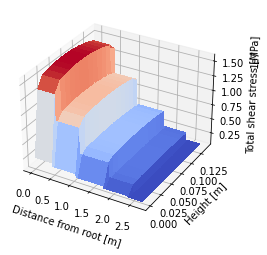

In [7]:
#Vizualisation fancy graphs Shear

lengthBeam, heightBeam = np.meshgrid(lengthBeam, heightBeam)

fig1, axs1 = plt.subplots(subplot_kw={"projection": "3d"})

# surf = ax.plot_surface(lengthBeam, heightBeam, vectNormalBendingStress(lengthBeam, 'x', heightBeam), cmap=mpl.cm.coolwarm,
#                        linewidth=0, antialiased=False)
    
surf1 = axs1.plot_surface(lengthBeam, heightBeam, vectShearStress(lengthBeam, heightBeam, 'x', 0.0008), cmap=mpl.cm.coolwarm,
                      linewidth=0, antialiased=False)
axs1.set_ylabel('Height [m]')
axs1.set_xlabel('Distance from root [m]')
axs1.set_zlabel('Total shear stress [MPa]')

KeyboardInterrupt: 

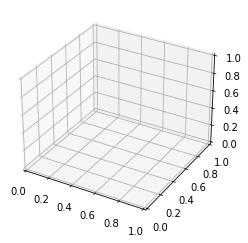

In [9]:
#Vizualisation fancy graphs Bending

#lengthBeam, heightBeam = np.meshgrid(lengthBeam, heightBeam)

fig2, axs2 = plt.subplots(subplot_kw={"projection": "3d"})

surf2 = axs2.plot_surface(lengthBeam, heightBeam, vectNormalBendingStress(lengthBeam, 'x', heightBeam), cmap=mpl.cm.coolwarm,
                        linewidth=0, antialiased=False)

# surf = axs1.plot_surface(lengthBeam, heightBeam, vectShearStress(lengthBeam, heightBeam, 'x', 0.0008), cmap=mpl.cm.coolwarm,
#                      linewidth=0, antialiased=False)
axs2.set_ylabel('Height [m]')
axs2.set_xlabel('Distance from root [m]')
axs2.set_zlabel('Total shear stress [MPa]')